## Buidling a CIFAR-10 classifier using transfer learning with a pre-trained model (ResNet50) and data augmentation.

#### Importing the required libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Loading the CIFAR-10 Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


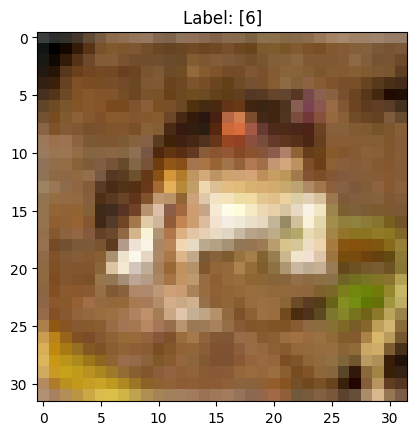

In [4]:
plt.imshow(train_images[0])
plt.title(f"Label: {train_labels[0]}")
plt.show()

#### Set Up Data Augmentation

In [5]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

#### Loading the Pre-trained ResNet50 Model

In [6]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False #Freezing so that they don;t update during the initial training

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


#### Build the Model

In [7]:
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

#### Compile the Model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training the Model

In [9]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 20ms/step - accuracy: 0.1008 - loss: 2.3836 - val_accuracy: 0.1002 - val_loss: 2.3026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.1038 - loss: 2.3027 - val_accuracy: 0.0998 - val_loss: 2.3027
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.0973 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.0995 -

#### Fine-tuning the model

In [10]:
base_model.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate for fine-tuning
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(train_images, train_labels, epochs=10,
                         validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 180s 91ms/step - accuracy: 0.1520 - loss: 3.0444 - val_accuracy: 0.3653 - val_loss: 1.9356
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 90ms/step - accuracy: 0.3113 - loss: 2.0767 - val_accuracy: 0.4632 - val_loss: 1.5915
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.3986 - loss: 1.7339 - val_accuracy: 0.5250 - val_loss: 1.3827
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.4662 - loss: 1.5387 - val_accuracy: 0.5725 - val_loss: 1.2677
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 88ms/step - accuracy: 0.5168 - loss: 1.3982 - val_accuracy: 0.6161 - val_loss: 1.1353
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 89ms/step - accuracy: 0.5613 - loss: 1.2751 - val_accuracy: 0.6462 - val_loss: 1.0544
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.5945 - loss: 1.1838 - val_accuracy: 0.6621 - val_loss: 0.9996
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 

#### Evaluate the Model

In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7168 - loss: 0.8263
Test accuracy: 0.7132


#### Visualize Training Results

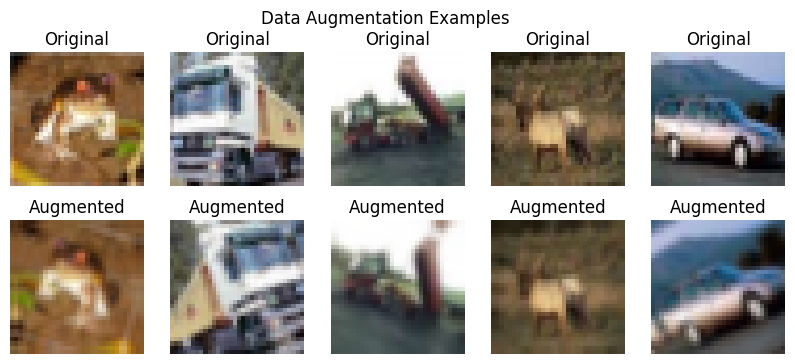

In [12]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i in range(5):
    axs[0, i].imshow(train_images[i])
    axs[0, i].set_title("Original")
    axs[0, i].axis('off')
    augmented_image = data_augmentation(tf.expand_dims(train_images[i], 0))
    axs[1, i].imshow(tf.squeeze(augmented_image).numpy())
    axs[1, i].set_title("Augmented")
    axs[1, i].axis('off')
plt.suptitle("Data Augmentation Examples")
plt.show()

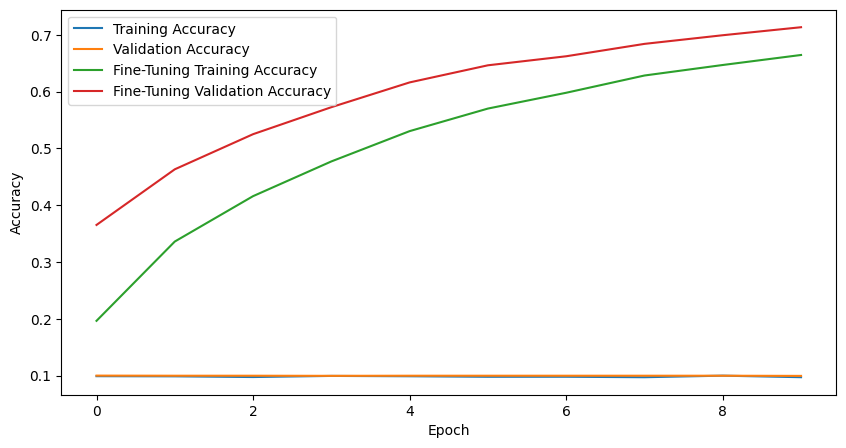

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
if 'accuracy' in history_fine.history:
    plt.plot(history_fine.history['accuracy'], label='Fine-Tuning Training Accuracy')
    plt.plot(history_fine.history['val_accuracy'], label='Fine-Tuning Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step


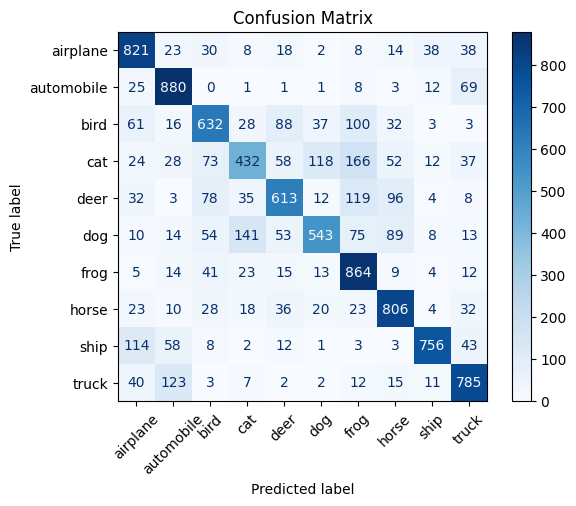

In [14]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_labels.flatten()
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

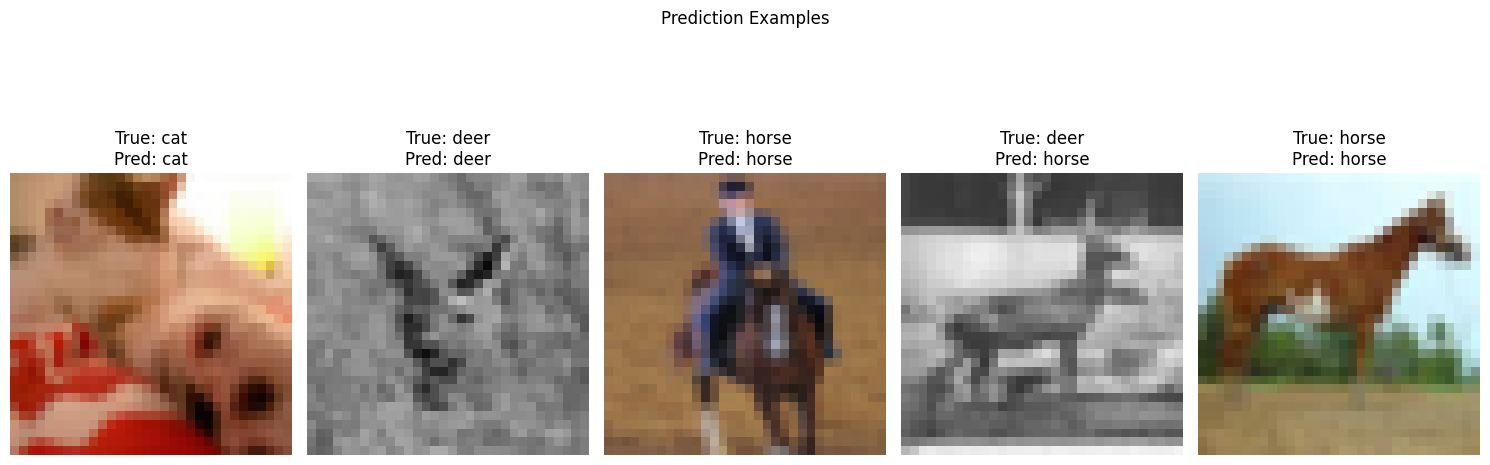

In [17]:
num_examples = 5

fig, axs = plt.subplots(1, num_examples, figsize=(15, 6))

for i in range(num_examples):
    idx = np.random.randint(0, len(test_images))
    img = test_images[idx]
    true_label = class_names[test_labels[idx][0]]
    predicted_label = class_names[y_pred_classes[idx]]

    axs[i].imshow(img)
    axs[i].set_title(f"True: {true_label}\nPred: {predicted_label}")
    axs[i].axis('off')

plt.suptitle("Prediction Examples")
plt.tight_layout()
plt.show()